In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240918175257_llm_gen.jsonl"

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-135.000000,unknown,C(F)(Cl)Cl,Melting temperature,[oC],250.00,To predict the melting temperature of the Comp...,2.851852
1,3.100000,Triethylsilane,CC[SiH](CC)CC,Vapor pressure,[kPa],3.10,"To predict the vapor pressure of Compound X, w...",0.000000
2,-110.300000,1-Bromopropane,CCCBr,Melting temperature,[oC],-50.00,To predict the melting temperature of Compound...,0.546691
3,0.890000,unknown,CCCCOC(=O)C=C,Density,[g/cm3],1.02,To predict the density of the Compound X compo...,0.146067
4,96.600000,unknown,Br[Sb](Br)Br,Melting temperature,[oC],115.00,To predict the melting temperature of the Comp...,0.190476
...,...,...,...,...,...,...,...,...
843,2.130000,Potassium ferrioxalate,[K+].o=c(-c(=o)o1)o[Fe-3]123(oc(-c(=o)o2)=o)oc...,Density,[g/cm3],2.12,"To predict the density of Compound X, we need ...",0.004695
844,2572.222222,unknown,O=[Ca],Melting temperature,[oC],2800.00,To predict the melting point of the Compound X...,0.088553
845,10.000000,unknown,CCC(C)OC(=O)C,Vapor pressure,[kPa],0.01,To predict the vapor pressure of the Compound ...,0.999000
846,480.000000,Iron(III) sulfate,[Fe+3].[Fe+3].[O-]S(=O)(=O)[O-].[O-]S([O-])(=O...,Melting temperature,[oC],550.00,To predict the melting temperature of Compound...,0.145833


<Axes: xlabel='error_rate', ylabel='Count'>

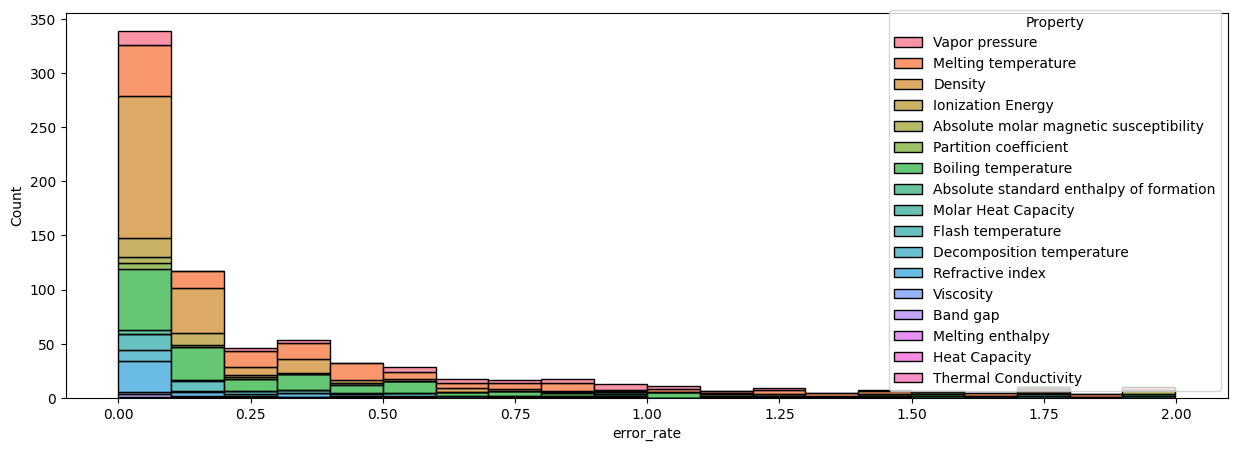

In [5]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)